<a href="https://colab.research.google.com/github/ElykelwinCosta/mapear_autuacoes_ibama/blob/main/autuacoes_ambientais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dados_2019 = 'https://github.com/mirianbatista/autuacoes/blob/master/%5B1%5D-10147957_Planilha_AIs_de_08_10_19_a_31_12_19_SIC_5210_21.xlsx?raw=true'
dados_2020 = 'https://github.com/mirianbatista/autuacoes/blob/master/%5B2%5D-10147975_Planilha_AIs_2020_SIC_5210_21.xlsx?raw=true'
dados_2021 = 'https://github.com/mirianbatista/autuacoes/blob/master/%5B3%5D-10147989_Planilha_AIs_2021_SIC_5210_21.xlsx?raw=true'

In [3]:
dados2019 = pd.read_excel(dados_2019)
dados2020 = pd.read_excel(dados_2020)
dados2021 = pd.read_excel(dados_2021)

In [4]:
dfs = [dados2019, dados2020, dados2021]
autuacoes = pd.concat(dfs)
autuacoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11953 entries, 0 to 774
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SEQ_AUTO_INFRACAO              8210 non-null   float64
 1   REGISTRADO_SICAFI              11953 non-null  object 
 2   DES_STATUS_FORMULARIO          11953 non-null  object 
 3   SIT_CANCELADO                  8501 non-null   object 
 4   NUM_AUTO_INFRACAO              11953 non-null  object 
 5   SER_AUTO_INFRACAO              17 non-null     object 
 6   TIPO_AUTO                      11743 non-null  object 
 7   TIPO_MULTA                     11921 non-null  object 
 8   VAL_AUTO_INFRACAO              11831 non-null  float64
 9   PATRIMONIO_APURACAO            4 non-null      object 
 10  GRAVIDADE_INFRACAO             1701 non-null   object 
 11  UNID_ARRECADACAO               8203 non-null   object 
 12  DES_AUTO_INFRACAO              11861 non-null  o

In [5]:
autuacoes.head()

,SEQ_AUTO_INFRACAO,REGISTRADO_SICAFI,DES_STATUS_FORMULARIO,SIT_CANCELADO,NUM_AUTO_INFRACAO,SER_AUTO_INFRACAO,TIPO_AUTO,TIPO_MULTA,VAL_AUTO_INFRACAO,PATRIMONIO_APURACAO,GRAVIDADE_INFRACAO,UNID_ARRECADACAO,DES_AUTO_INFRACAO,DES_RECEITA,NO_TIPO_INFRACAO,DAT_HORA_AUTO_INFRACAO,FORMA_ENTREGA,DAT_CIENCIA_AUTUACAO,DS_CONCILIACAO_UNIDADE,COD_MUNICIPIO,NOM_MUNICIPIO,SIG_UF,BIOMA,UNIDADE_CONSERVACAO,NUM_PROCESSO,DES_INFRACAO,NOME_INFRATOR,CPF_CNPJ_INFRATOR,QTD_AREA,INFRACAO_AREA,DES_OUTROS_TIPO_AREA,NUM_LONGITUDE_AUTO,NUM_LATITUDE_AUTO,DES_LOCAL_INFRACAO,SEQ_NOTIFICACAO,UNID_CONTROLE,NOM_OPERACAO,DES_TIPO_OPERACAO,DS_ORGAO,OPERACAO_SOL_RECURSO,DAT_LANCAMENTO,DAT_ALTERACAO,DES_TIPO_HISTORICO_FORMULARIO,ENQUADRAMENTO,ENQUADRAMENTO_COMPLEMENTAR,DAT_ULTIMA_ATUALIZACAO
0,NaN,N,Impresso,NaN,E1CTE6RS,NaN,Multa Simples,Aberta,3600.0,NaN,Baixa,NaN,Importar 30 (trinta) indivíduos da espécie Chr...,Penalidade pecuniária - Pesca,Pesca,2019-12-31 13:29:37,Representante,NaT,Núcleo de Conciliação Ambiental/SP 2,3518800.0,Guarulhos,SP,Mata Atlantica,NaN,NaN,Infração de pesca(Não Classificada-Móvel),AQUARIOCA PRODUTOS AQUATICOS LTDA,21562031000106,NaN,Não se aplica,NaN,-46.487499,-23.425554,Terminal de Cargas (TECA) do Aeroporto Interna...,NaN,SP/SUPES,NaN,NaN,IBAMA,NaN,NaT,2020-08-06 17:27:12,NaN,38 Decreto 6514; 70 1º Lei 9605; 72 Lei 9605; ...,NaN,2021-03-14 22:20:47
1,2036188.0,S,Lavrado,N,BN4GBUAS,NaN,Multa simples,Aberta,1500.0,NaN,NaN,SP/SUPES,Inserir informação falsa ou enganosa em sistem...,Penalidade pecuniária - Outras,Administração Ambiental,2019-12-31 12:00:00,Correios,2020-01-17 00:00:00,Núcleo de Conciliação Ambiental/SP 2,3536802.0,Pedra Bela,SP,Mata Atlantica,NaN,2.027001e+15,Infração de Administração Ambiental(Não Classi...,CEZAR XAVIER DE OLIVEIRA,***212798**,NaN,NaN,NaN,-46.668335,-23.559721,Rua dos Limas 06,NaN,SP/SUPES,NaN,Operação,NaN,NaN,2020-04-17 00:00:00,2020-04-17 17:06:14,Preenchido,82 Decreto 6514/2008.,"34, Parágrafo 5 IN 10/2011.",2021-03-14 22:20:47
2,2039240.0,S,Lavrado,N,PML3IR96,NaN,Multa simples,Aberta,19000.0,NaN,NaN,SP/SUPES,Inserir informação falsa ou enganosa em sistem...,Penalidade pecuniária - Outras,Administração Ambiental,2019-12-31 12:00:00,Correios,2020-01-16 00:00:00,Núcleo de Conciliação Ambiental/SP 2,3530607.0,Mogi das Cruzes,SP,Mata Atlantica,NaN,2.027002e+15,Infração de Administração Ambiental(Não Classi...,FUAD CARAM NETO,***167808**,NaN,NaN,NaN,-46.668335,-23.559721,"Rua Arujá, 216",NaN,SP/SUPES,NaN,Operação,IBAMA,NaN,2020-08-14 00:00:00,2020-08-14 10:20:22,Preenchido,82 Decreto 6514/2008.,"35, Parágrafo 2 IN 10/2011.",2021-03-14 22:20:47
3,2041283.0,S,Cancelado,S,3YDZ962G,NaN,Multa simples,Aberta,1500.0,NaN,NaN,SP/SUPES,Inserir informação falsa ou enganosa em sistem...,Penalidade pecuniária - Outras,Administração Ambiental,2019-12-31 12:00:00,Correios,2020-01-16 00:00:00,Núcleo de Conciliação Ambiental/SP 2,3530607.0,Mogi das Cruzes,SP,Mata Atlantica,NaN,2.027002e+15,Infração de Administração Ambiental(Não Classi...,FUAD CARAM NETO,***167808**,NaN,NaN,NaN,-46.668335,-23.559721,"Rua Arujá, 216",NaN,SP/SUPES,NaN,Operação,IBAMA,NaN,2020-11-24 00:00:00,2021-02-02 17:24:30,Cancelado,82 Decreto 6514/2008.,"35, Parágrafo 2 IN 10/2011.",2021-03-14 22:20:47
4,NaN,N,Impresso,NaN,25S7EF8C,NaN,Multa Simples,Fechada,1500.0,NaN,NaN,NaN,Utilizar três espécimes da fauna silvestre em ...,Penalidade pecuniária - Fauna,Fauna,2019-12-30 17:01:07,Correios,2019-12-30 00:00:00,Núcleo de Conciliação Ambiental/SP 2,3509502.0,Campinas,SP,Mata Atlantica,NaN,NaN,Infração da Fauna(Não Classificada-Móvel),JOÃO ESLEN LIMA BARRETO,***745248**,NaN,Não se aplica,NaN,-47.144169,-23.007778,Criador amador de passeriformes João Esley Lim...,NaN,VIRACOPOS/UNID_TEC,NaN,NaN,IBAMA,OPERAÇÃO COMÉRCIO EXTERIOR,NaT,2019-12-30 17:18:46,NaN,24 I Decreto 6514; 70 1º Lei 9605; 72 Lei 9605...,"36, III IN Ibama 10/2011.",2021-03-14 22:20:47




## **Valores recebidos por estado**



In [6]:
vl_infracoes_estado = autuacoes[['SIG_UF','VAL_AUTO_INFRACAO']].groupby('SIG_UF').sum().sort_values(by='VAL_AUTO_INFRACAO', ascending=False)
vl_infracoes_estado

,VAL_AUTO_INFRACAO
SIG_UF,
RO,1.608302e+09
PA,1.164029e+09
MT,4.003399e+08
AM,2.755090e+08
RJ,1.332018e+08
SP,1.324015e+08
DF,9.475243e+07
MG,6.786506e+07
MA,6.559365e+07


## **Autuações por bioma**

In [7]:
autuacoes_bioma = autuacoes.BIOMA.value_counts().to_frame().reset_index().rename(columns={'index':'bioma','BIOMA':'qtd_autuacoes'})
autuacoes_bioma

,bioma,qtd_autuacoes
0,Amazonia,4171
1,Mata Atlantica,2667
2,Cerrado,2075
3,Costeiro e Marinho,1565
4,Caatinga,1203
5,Pampa,163
6,Pantanal,98
7,"Cerrado, Mata Atlantica",1
8,"Caatinga, Cerrado",1



## **Cidades mais atingidas**

In [8]:
infracoes_cidade = autuacoes.NOM_MUNICIPIO.value_counts().to_frame().reset_index().rename(columns={'index':'cidade','NOM_MUNICIPIO':'qtd_infracoes_cidade'})
infracoes_cidade

,cidade,qtd_infracoes_cidade
0,Brasília,530
1,Altamira,195
2,Campinas,193
3,Fortaleza,190
4,São Félix do Xingu,177
...,...,...
1491,Praia Grande,1
1492,Mariana,1
1493,Lages,1
1494,São João da Varjota,1



## **Qtd de autuações por mês**

In [9]:
autuacoes['month'] = pd.DatetimeIndex(autuacoes['DAT_HORA_AUTO_INFRACAO']).month
autuacoes_mes = autuacoes.month.value_counts().to_frame().reset_index().rename(columns = {"index" : "mes", "month" : "qtd_autuacoes_mes"}).astype(int)
autuacoes_mes

,mes,qtd_autuacoes_mes
0,12,1631
1,11,1620
2,2,1371
3,10,1204
4,3,869
5,6,803
6,9,800
7,1,760
8,5,757
9,4,736


In [10]:
#depois ver infratores do mês mais trágico

## **TS autuações ambientais**

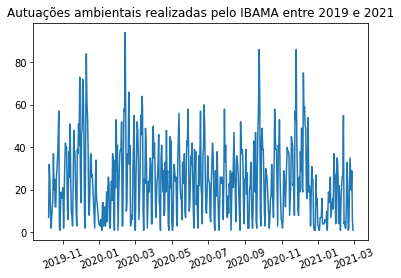

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

autuacoes.DAT_HORA_AUTO_INFRACAO = pd.to_datetime(autuacoes['DAT_HORA_AUTO_INFRACAO']).dt.date
ts_autuacoes = autuacoes.DAT_HORA_AUTO_INFRACAO.value_counts().to_frame().reset_index().rename(columns={'index':'dt', 'DAT_HORA_AUTO_INFRACAO': 'qtd_autuacoes_dt'})
sns.lineplot(x="dt", y="qtd_autuacoes_dt", data=ts_autuacoes).set(xlabel=None, ylabel=None)
plt.xticks(rotation=20)
plt.title('Autuações ambientais realizadas pelo IBAMA entre 2019 e 2021')
plt.show()


##   **Top10 maiores infratores**

In [12]:
infratores = autuacoes.NOME_INFRATOR.value_counts()[:10].to_frame().reset_index().rename(columns={'index':'infrator','NOME_INFRATOR':'qtd_infracoes'})
infratores
#Petrobrás cometeu 228 infrações 

,infrator,qtd_infracoes
0,PETROLEO BRASILEIRO S/A - PETROBRAS,148
1,ISMAEL COELHO,53
2,PETROBRAS - PETROLEO BRASILEIRO S.A.,52
3,GILSON ALCIDES DE JESUS,35
4,ROGÉRIO LIMA COIMBRA,30
5,PETROBRAS S.A. / E&P UN-RIO,28
6,GUILHERME GALVANE BATISTA,21
7,BALSA MUNDO SERRARIA E PLANTIO LTDA,21
8,RAINBOW DEFENSIVOS AGRÍCOLAS LTDA,19
9,RODRIGO SOUZA FERNANDES RANGEL,13


##   **Tipos de infração do maior infrator**

In [13]:
petrobras = autuacoes[autuacoes.NOME_INFRATOR.eq('PETROLEO BRASILEIRO S/A - PETROBRAS') | 
                                     autuacoes.NOME_INFRATOR.eq('PETROBRAS - PETROLEO BRASILEIRO S.A.') | 
                                     autuacoes.NOME_INFRATOR.eq('PETROBRAS S.A. / E&P UN-RIO')]

In [14]:
autuacoes[autuacoes.NOME_INFRATOR.eq('PETROLEO BRASILEIRO S/A - PETROBRAS')].NOM_MUNICIPIO.value_counts()

Rio de Janeiro           58
Macaé                    26
Campos dos Goytacazes    24
Santos                    8
Marataízes                8
Presidente Kennedy        6
Vitória                   4
Brasília                  3
Anchieta                  3
Fortaleza                 2
Aracruz                   2
São Mateus                1
Cananéia                  1
Itapemirim                1
Rio das Ostras            1
Name: NOM_MUNICIPIO, dtype: int64

In [15]:
tipos_infracoes_petrobras = petrobras.NO_TIPO_INFRACAO.value_counts()
tipos_infracoes_petrobras

Emergência Ambiental    91
Controle Ambiental      79
Licenciamento           48
Qualidade Ambiental      9
Outras                   1
Name: NO_TIPO_INFRACAO, dtype: int64

In [16]:
petrobras.VAL_AUTO_INFRACAO.sum()

172268650.0

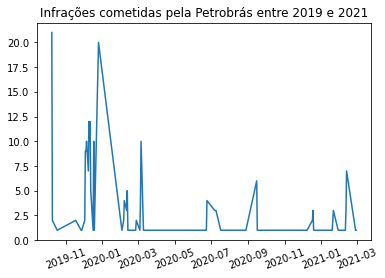

In [17]:
ts_autuacoes_petro = petrobras.DAT_HORA_AUTO_INFRACAO.value_counts().to_frame().reset_index().rename(columns={'index':'dt', 'DAT_HORA_AUTO_INFRACAO': 'qtd_autuacoes_dt'})
sns.lineplot(x="dt", y="qtd_autuacoes_dt", data=ts_autuacoes_petro).set(xlabel=None, ylabel=None)
plt.xticks(rotation=20)
plt.title('Infrações cometidas pela Petrobrás entre 2019 e 2021')
plt.show()

In [18]:
#ver depois se a petrobras pagou as multas (status)


##  **Top10 tipos de infrações**

In [19]:
tipos_infracoes = autuacoes.NO_TIPO_INFRACAO.value_counts()[:10].to_frame().reset_index().rename(columns={'index':'infracao','NO_TIPO_INFRACAO':'qtd_infracoes'})
tipos_infracoes
#52.6% das Emergências Ambientais entre 2019 e 2021 foram cometidas pela Petrobrás

,infracao,qtd_infracoes
0,Flora,4341
1,Fauna,1961
2,Administração Ambiental,1309
3,Cadastro Técnico Federal,1156
4,Pesca,949
5,Qualidade Ambiental,758
6,Licenciamento,536
7,Controle Ambiental,372
8,Outras,208
9,Emergência Ambiental,173


In [20]:
#maiores infratores da flora
autuacoes[['NOME_INFRATOR','NO_TIPO_INFRACAO']].groupby(autuacoes['NO_TIPO_INFRACAO']).get_group('Flora').NOME_INFRATOR.value_counts()

# ler depois sobre GUILHERME GALVANE BATISTA https://noticias.uol.com.br/colunas/rubens-valente/2021/03/14/multas-ambientais-governo-bolsonaro-supremo-tribunal.htm 

GUILHERME GALVANE BATISTA              21
BALSA MUNDO SERRARIA E PLANTIO LTDA    20
Amaggi Exportação e Importação LTDA    11
Juliano Clemente Oliveira               9
IPEZAI COMERCIO DE MADEIRAS LTDA        8
                                       ..
AGROPECUÁRIA MILLENIUM LTDA             1
LUCAS VIEIRA AUGUSTO DOS SANTOS         1
Edinette Alves Campos                   1
JOSÉ VALENTINO DA SILVA                 1
Luiz Rodrigues dos Santos               1
Name: NOME_INFRATOR, Length: 3517, dtype: int64


##  **Quais infratores tiveram as infrações mais caras?**

In [21]:
autuacoes[['NOME_INFRATOR','VAL_AUTO_INFRACAO','DES_INFRACAO']].sort_values(by='VAL_AUTO_INFRACAO', ascending=False)[:10]

,NOME_INFRATOR,VAL_AUTO_INFRACAO,DES_INFRACAO
7733,VOLKSWAGEN DO BRASIL INDUSTRIA DE VEICULOS AUT...,50000000.0,Infração referente a Qualidade Ambiental(Não C...
7734,VOLKSWAGEN DO BRASIL INDUSTRIA DE VEICULOS AUT...,50000000.0,Infração referente a Qualidade Ambiental(Não C...
2811,SALOBO METAIS S.A,50000000.0,Infração de Licenciamento(Não Classificada-Móvel)
7385,EDIO NOGUEIRA,50000000.0,Infração da Flora(Não Classificada-Móvel)
1994,DANIEL MESSAC DE MORAIS,50000000.0,Infração da Flora(Não Classificada-Móvel)
1733,GUILHERME GALVANE BATISTA,47530000.0,Infração da Flora(Não Classificada-Móvel)
1746,BUNGE ALIMENTOS SA,47530000.0,Infração da Flora(Não Classificada-Móvel)
1743,GUILHERME GALVANE BATISTA,47510000.0,Infração da Flora(Não Classificada-Móvel)
1745,BUNGE ALIMENTOS SA,47510000.0,Infração da Flora(Não Classificada-Móvel)
1747,Amaggi Exportação e Importação LTDA,46625000.0,Infração da Flora(Não Classificada-Móvel)



##   **Infrações por gravidade**

In [22]:
autuacoes.GRAVIDADE_INFRACAO.value_counts()

Baixa    1077
Média     613
Médio       7
Leve        4
Name: GRAVIDADE_INFRACAO, dtype: int64